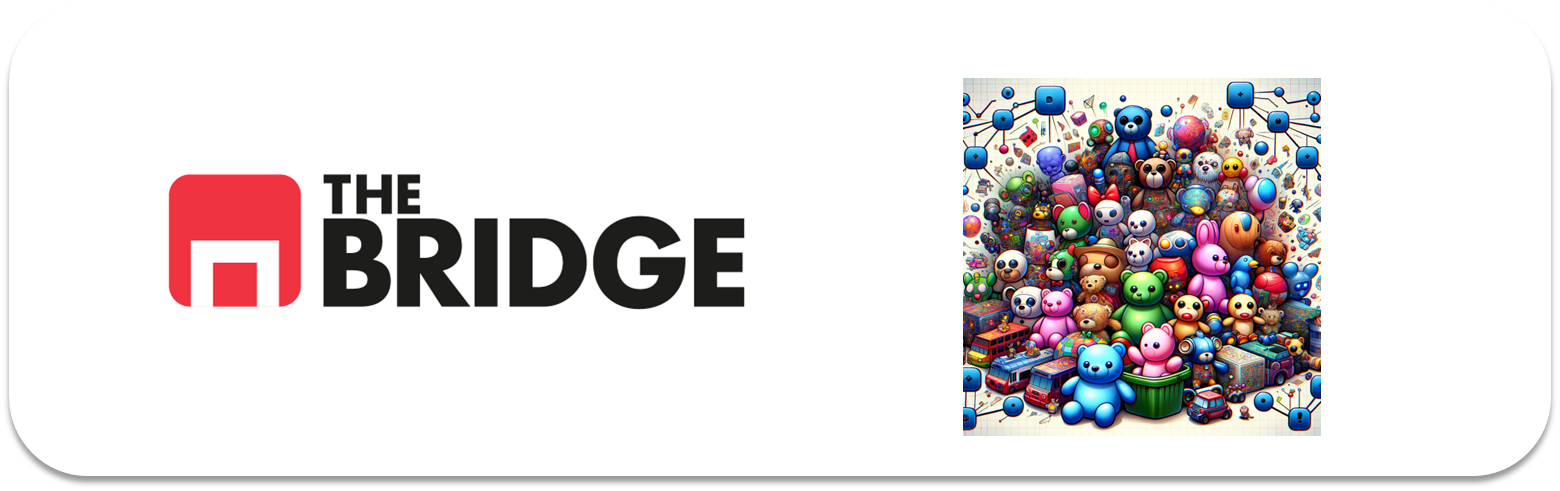

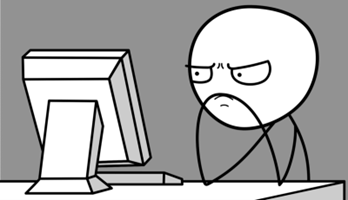

Para ejercitarte y afianzar lo aprendido sobre **Clustering Jerárquico**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Descripción del "Problema"

Existen disponibles datos de encuestas y cuestionarios a 26 instituciones. Estas instituciones han sido evaluadas bajo distintos criterios de desempeño, como profesorado, costos, ubicación, becas e infraestructura. Cada criterio va del 1 al 5, siendo 5 el mayor.

El objetivo principal será segmentar las instituciones en grupos basásndonos en los criterios antes mencionados, y luego generar descripciones y recomendaciones a seguir con respecto a cada uno de los grupos identificados. Las recomendaciones pueden ser para distintos clientes.
    </div>

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Toolbox_datascience as tds
import importlib

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

In [132]:
importlib.reload(tds)

<module 'Toolbox_datascience' from 'c:\\Users\\rodri\\Git_Repositories\\ONLINE_DS_THEBRIDGE_ROD\\Sprint_13\\Unidad_02\\Ejercicios_Workout\\Toolbox_datascience.py'>

### Ejercicio 1

Carga los datos ("Engg_College_Data") y haz una primera inspección "rápida".

In [133]:
df = pd.read_csv("./data/Engg_College_Data.csv")
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [134]:
le = LabelEncoder()

# Aplicar LabelEncoder a la columna 'Engg_College'
df['Engg_College'] = le.fit_transform(df['Engg_College'])

### Ejercicio 2

Crea un train_set con una única variable de tipo índice (que nos servirá para identifcar a las instituciones en cada clúster)

In [135]:
df.set_index('SR_NO', inplace=True)

# Mostrar el dataframe resultante
print(df)

       Engg_College  Teaching  Fees  Placements  Internship  Infrastructure
SR_NO                                                                      
1                 0         5     2           5           5               3
2                 1         4     2           5           5               3
3                 2         4     5           5           4               5
4                 3         5     4           5           4               4
5                 4         2     5           2           2               5
6                 5         3     4           3           3               4
7                 6         1     3           1           1               2
8                 7         4     4           5           5               5
9                 8         4     4           4           4               4
10                9         3     4           3           4               5
11               10         3     4           3           4               5
12          

### Ejercicio 3

Determina el tipo de cada variable, haciendo un univariante de las mismas.

In [136]:
tds.clasifica_variables(df,10,10)

,nombre_variable,tipo_sugerido
0,Engg_College,Numérica Discreta
1,Teaching,Categórica
2,Fees,Categórica
3,Placements,Categórica
4,Internship,Categórica
5,Infrastructure,Categórica


In [137]:
features = ['Teaching','Fees','Placements','Internship','Infrastructure','Engg_College']

### Ejercicio 4

Es hora de hacer el miniEDA. Fíjate que en este caso no tenemos contínuas numéricas que nos permitan ver claramente una clusterización con scatter plots. Compruébalo haciendo un pairplot del dataset.

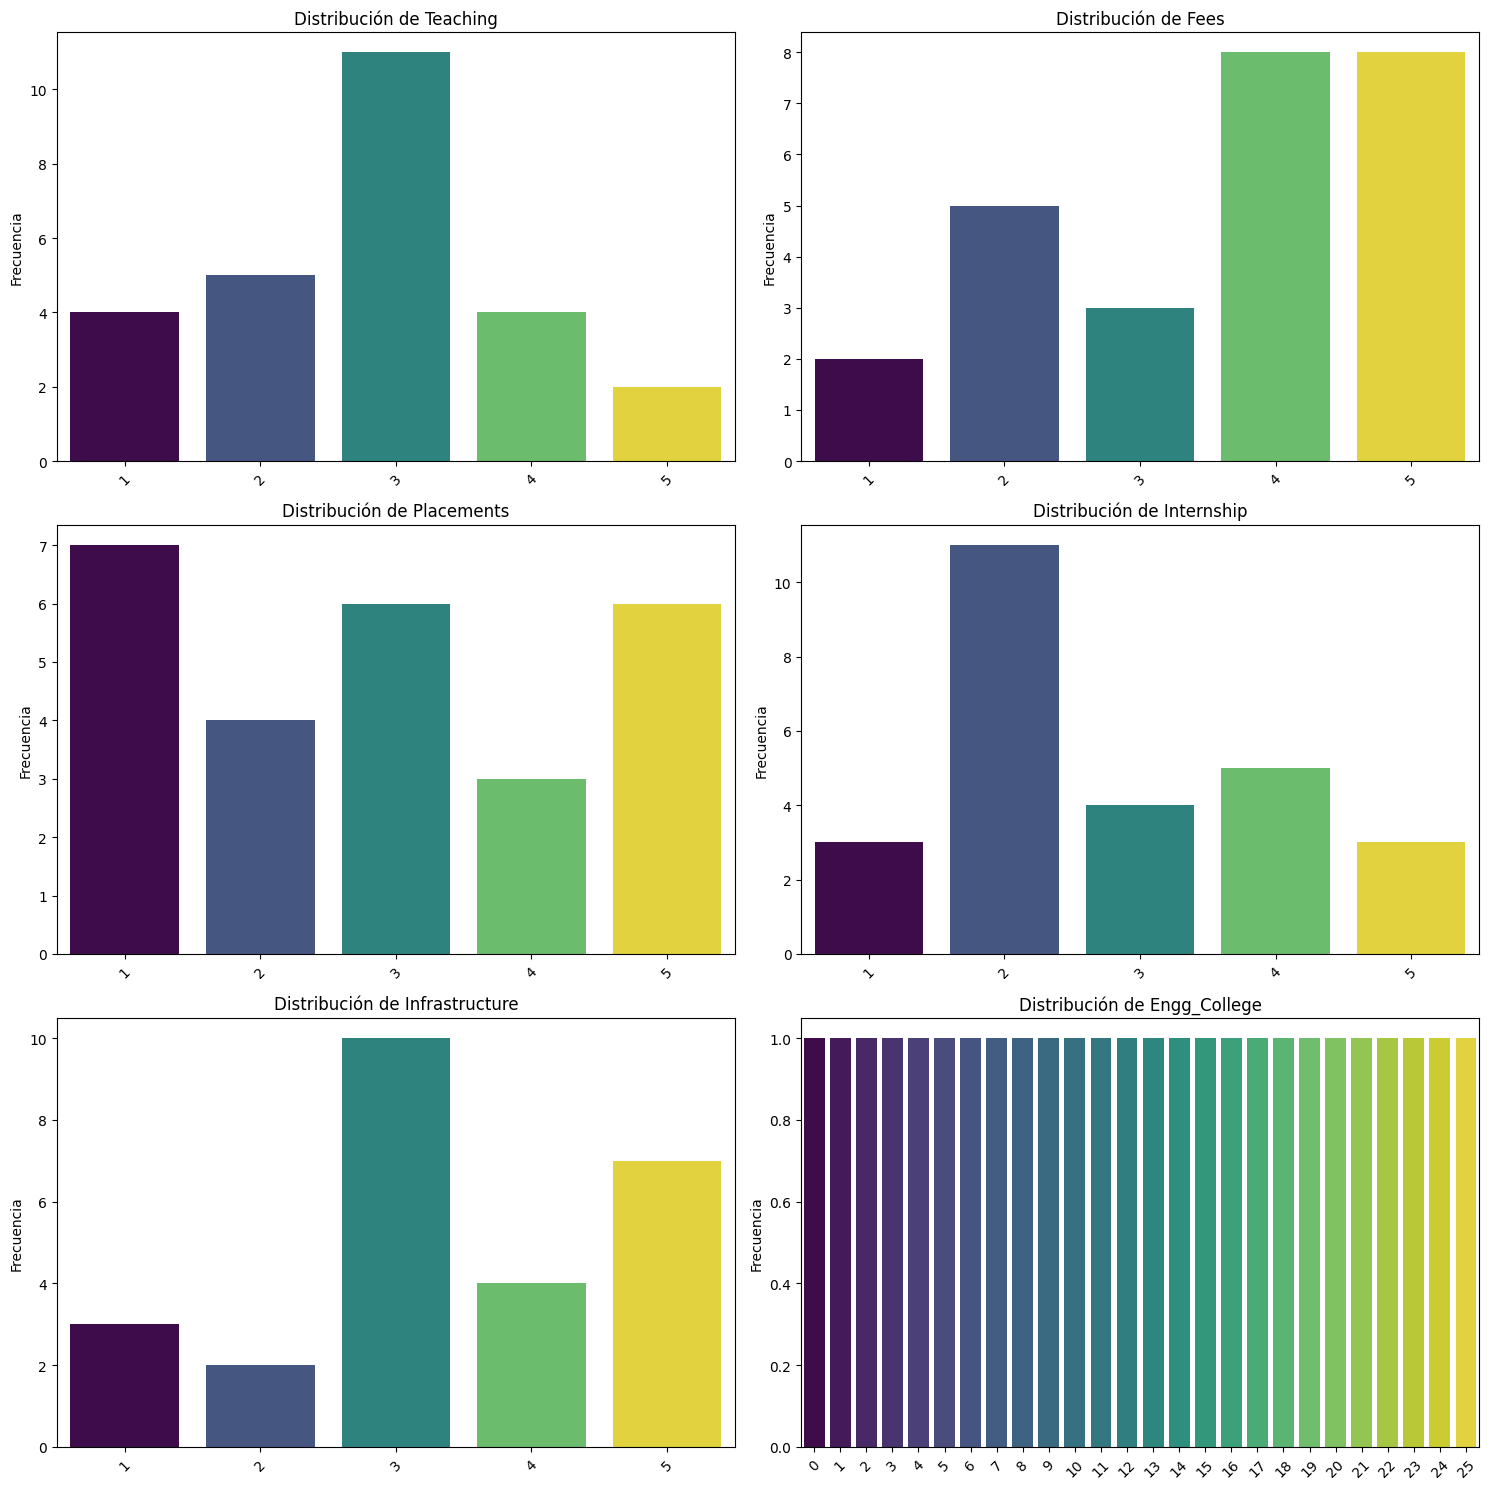

In [138]:
tds.pinta_distribucion_categoricas(df,features)

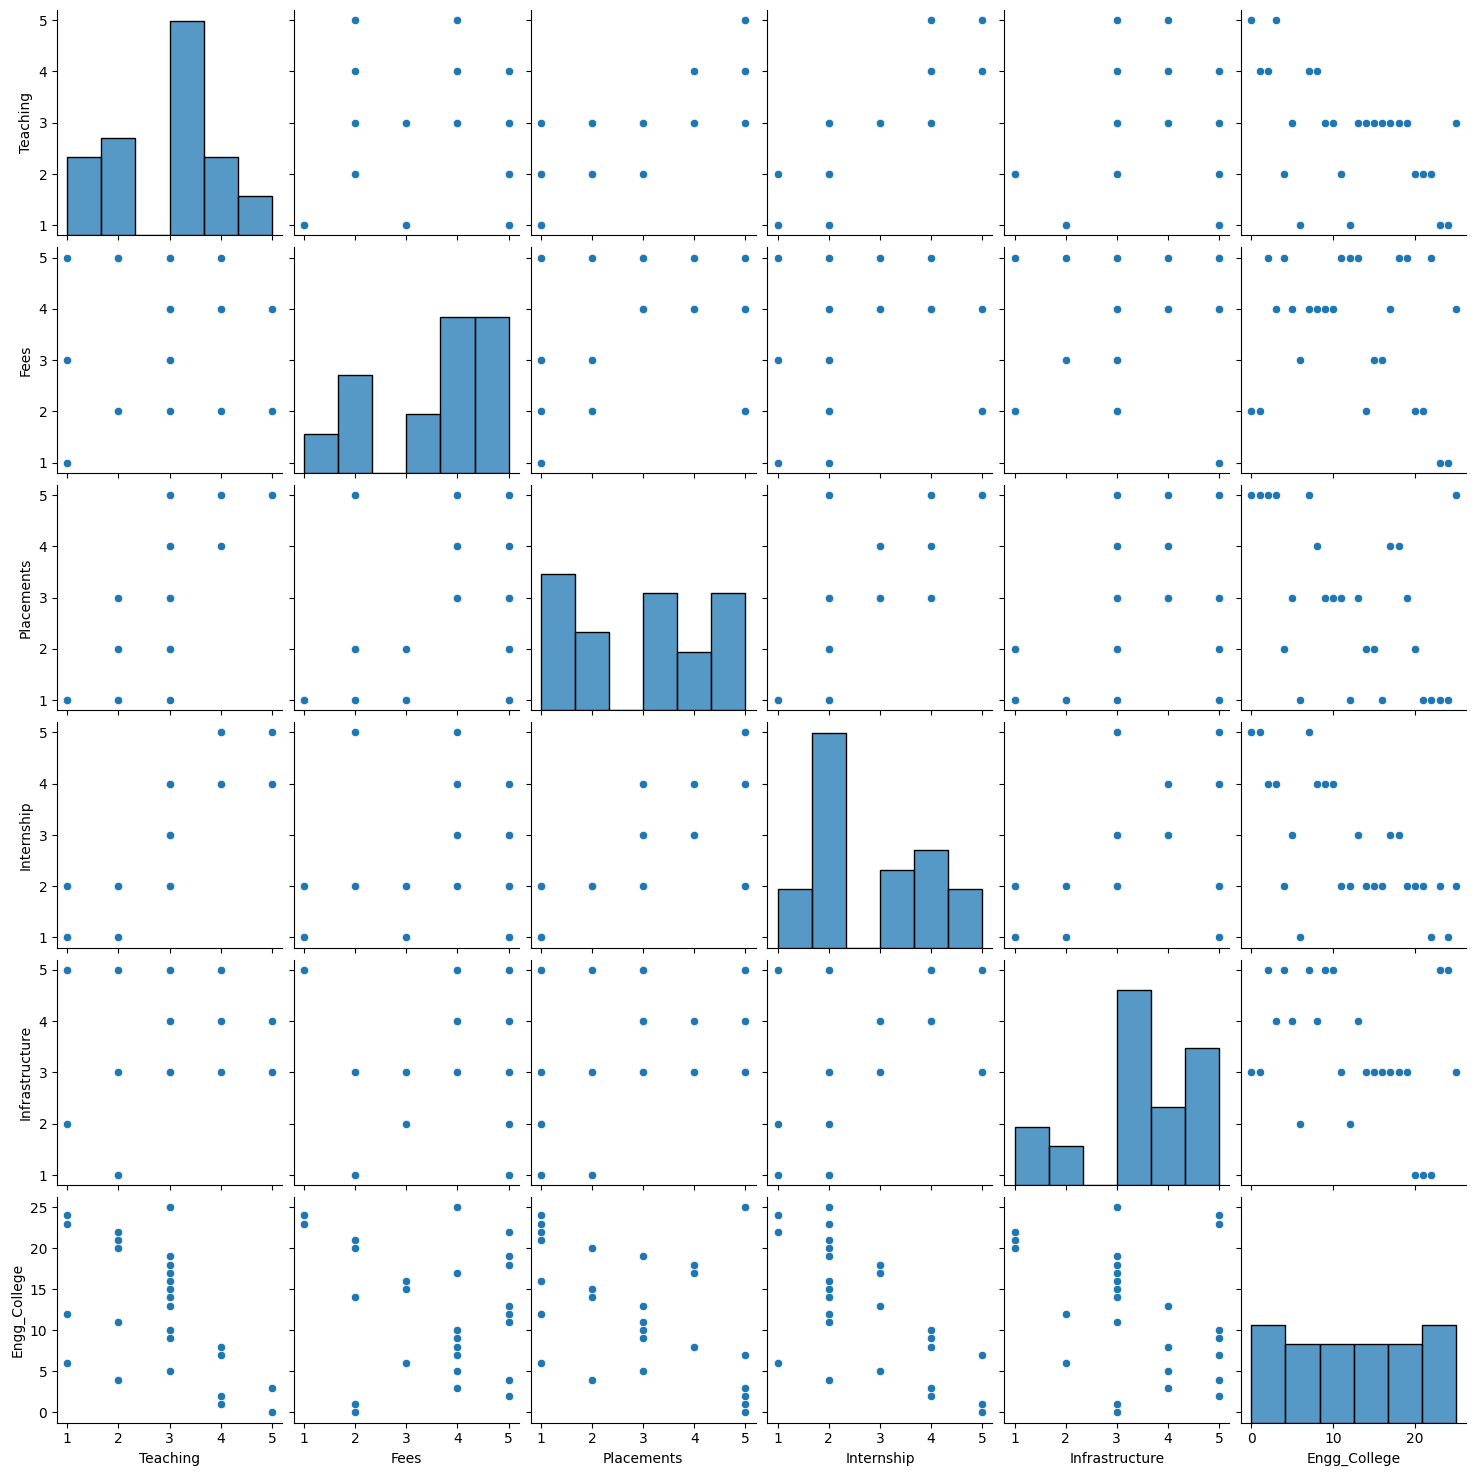

In [139]:
sns.pairplot(df[features])

### Ejercicio 5

Podríamos intentar cualquier tipo de clusterización, pero vamos a emplear una clusterización jerárquica porque sea cual sea la agrupación si que nos interesa establecer una jerarquía o una relación de distancia entre las diferentes instituciones (es algo que nos dicen desde el cliente, o sea "Negocio")

Elegido el tipo de clustering, tenemos que determinar los hiperparámetros. En este caso, el número de clusteres. Para ello nos vamos a apoyar en el dendrograma. Construye el dendrograma utilizando "average" como el método de ligado o linkage.



NOTA: no lo hemos hecho, ni dicho, pero nos quedaremos con todas las variables para sean features y como están en la misma escala no hay que procesarlas otra vez.

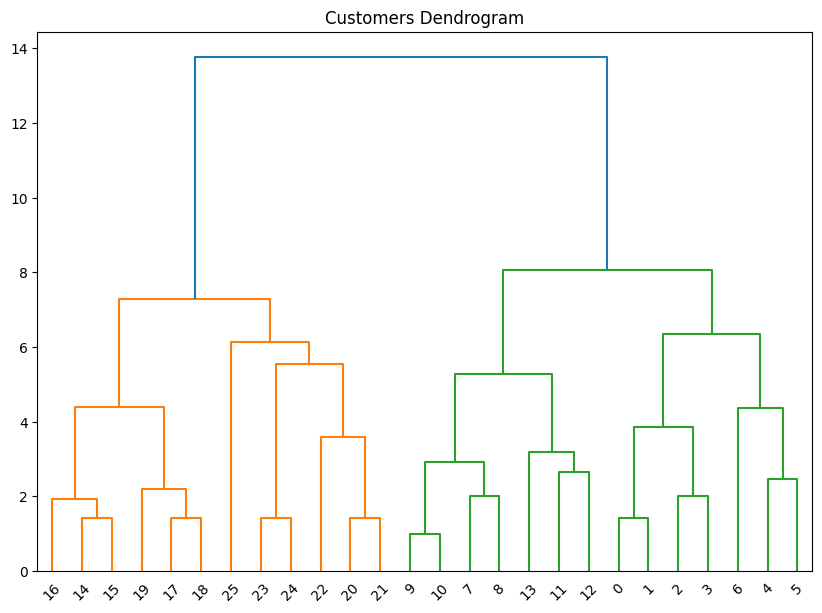

In [140]:


plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

selected_data = df[features]
clusters = shc.linkage(selected_data, 
            method='average', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

### Ejercicio 6

Utilizando el método del máximo salto horizontal o método del máximo gap, ¿dónde colocarías la recta de corte? Vuelve a dibujar el dendrograma superponiendo esa línea. Decide el número de clusteres.

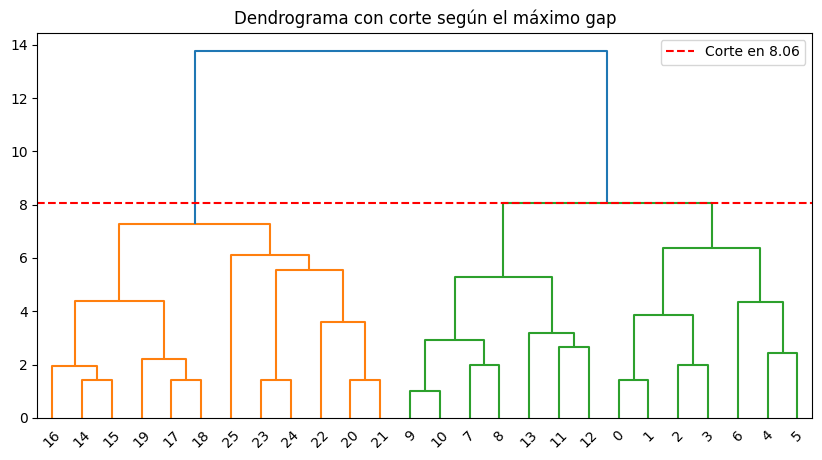

In [141]:
# Realizamos clusterización jerárquica
linked = shc.linkage(df, method='average')

# Dibujamos el dendrograma
plt.figure(figsize=(10, 5))
dendrogram = shc.dendrogram(linked)

# Buscamos el máximo gap (salto más grande)
distances = linked[:, 2]  # La tercera columna contiene las alturas de los merges
gaps = np.diff(distances)  # Diferencias entre alturas sucesivas
max_gap_index = np.argmax(gaps)  # Índice del máximo gap

# Trazamos la línea de corte justo debajo del máximo salto
cutoff = distances[max_gap_index]  # Altura donde cortamos

plt.axhline(y=cutoff, color='r', linestyle='--', label=f'Corte en {cutoff:.2f}')
plt.legend()
plt.title("Dendrograma con corte según el máximo gap")
plt.show()

### Ejercicio 7

Utilizando el codigo siguiente, emplea el número de clústeres obtenidos en el ejercicio anterior (usa 4 si no has logrado obtener un número que te convenza) y muestra cuántas instituciones hay por cluster. ¿Qué te llama la atención?

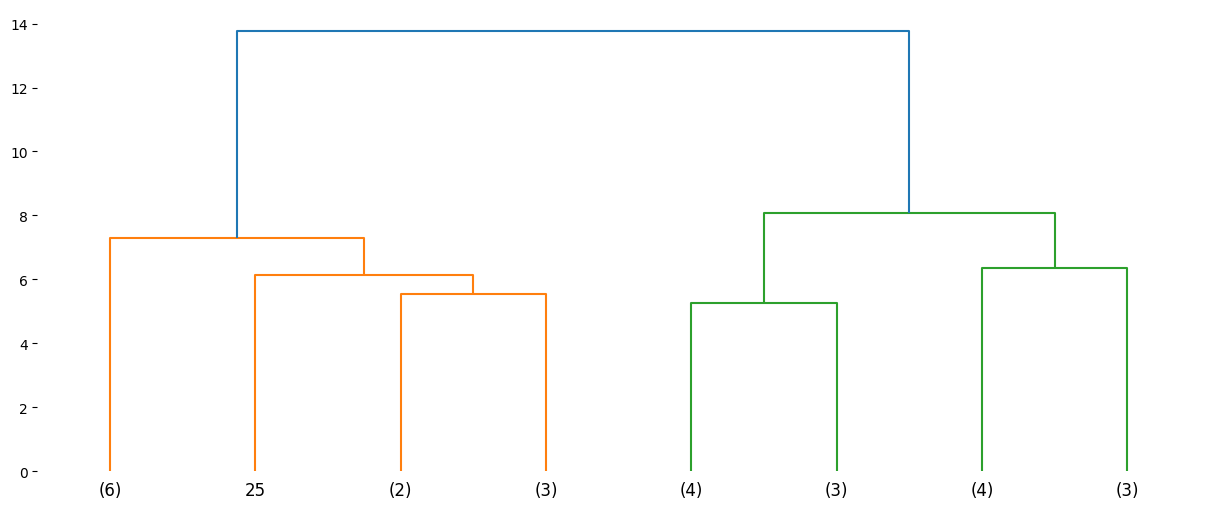

In [142]:
plt.figure(figsize=(15, 6))
dend = shc.dendrogram(linked, truncate_mode='lastp', p=8)  # Sin labels
sns.despine(left=True, bottom=True)
plt.show()

### Ejercicio 8

Previo a analizar las características específicas de cada clúster, analiza el clúster con menor número de elementos, es decir muestra las características de sus elementos constituyentes

In [143]:
# Obtener las asignaciones de clústeres usando `fcluster`
from scipy.cluster.hierarchy import fcluster
max_d = 8  # Establece el número de clústeres que deseas
cluster_labels = fcluster(linked, max_d, criterion='maxclust')

# Verificar las asignaciones de clúster
print("Asignaciones de clústeres:", cluster_labels)

Asignaciones de clústeres: [7 7 7 7 8 8 8 5 5 5 5 6 6 6 1 1 1 1 1 1 3 3 3 2 2 4]


In [144]:
# Contar cuántos elementos hay en cada clúster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

# Mostrar el tamaño de cada clúster
print("Tamaño de cada clúster:", cluster_sizes)

# Identificar el clúster con el menor número de elementos
min_cluster = min(cluster_sizes, key=cluster_sizes.get)
print(f"El clúster con menos elementos es el clúster {min_cluster} con {cluster_sizes[min_cluster]} elementos.")


Tamaño de cada clúster: {1: 6, 2: 2, 3: 3, 4: 1, 5: 4, 6: 3, 7: 4, 8: 3}
El clúster con menos elementos es el clúster 4 con 1 elementos.


In [145]:
# Filtrar los datos para mostrar solo los elementos del clúster más pequeño
df_min_cluster = df[cluster_labels == min_cluster]

# Mostrar las características de los elementos del clúster más pequeño
print(f"Características de los elementos del clúster {min_cluster}:")
print(df_min_cluster)


Características de los elementos del clúster 4:
       Engg_College  Teaching  Fees  Placements  Internship  Infrastructure
SR_NO                                                                      
26               25         3     4           5           2               3


### Ejercicio 9

Nos hemos adelantado en el ejercicio anterior. Es hora de construir el clustering tal como hemos visto en el workout, utiliza el "AgglomerativeClustering" de sklearn para hacer el agrupamiento con el número de clusteres elegido y asigna las etiquetas a cada instancia. (Recuerda que hemos usado el linkage a "average", no a "ward" como se suele emplear)

In [147]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='average')
clustering_model.fit(df)
clustering_model.labels_

array([4, 4, 4, 4, 1, 1, 1, 7, 7, 7, 7, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 6, 6, 5], dtype=int64)

### Ejercicio 10

Comprueba que las instancias asignadas al clúster con 2 instancias son las entidades "X" e "Y"

In [153]:

# Asumiendo que df es el dataframe con las características numéricas (sin la columna 'Engg_College')
linked = shc.linkage(df, method='average')  # Realiza el linkage (usando df sin la columna 'Engg_College')

# Obtener las asignaciones de clústeres con el número máximo de clústeres deseado (por ejemplo 4)
from scipy.cluster.hierarchy import fcluster
max_d = 8  # Establece el número de clústeres que deseas
cluster_labels = fcluster(linked, max_d, criterion='maxclust')

# Ver las asignaciones de clústeres
print("Asignaciones de clústeres:", cluster_labels)


# Filtrar los datos para mostrar solo los elementos del clúster con menor tamaño
df_min_cluster = df[cluster_labels == min_cluster]

# Mostrar las características de los elementos del clúster con menor tamaño
print(f"Características de los elementos del clúster {min_cluster}:")
print(df_min_cluster)

# Verificar si las entidades "X" e "Y" están en este clúster
print("¿Está 'X' en el clúster?", 'X' in df_min_cluster.index)
print("¿Está 'Y' en el clúster?", 'Y' in df_min_cluster.index)


Asignaciones de clústeres: [7 7 7 7 8 8 8 5 5 5 5 6 6 6 1 1 1 1 1 1 3 3 3 2 2 4]
Características de los elementos del clúster 4:
       Engg_College  Teaching  Fees  Placements  Internship  Infrastructure
SR_NO                                                                      
26               25         3     4           5           2               3
¿Está 'X' en el clúster? False
¿Está 'Y' en el clúster? False


### Ejercicio 11

Igual que podemos intuir que el cluster "pequeño" es el de las instituiciones peor puntuadas, muestra los valores medios de las features para cada clúster y da tu interpretación de que es cada uno. Emplea un gráfico comparativo.


### Ejercicio 12

Para finalizar, ¿qué recomendaciones darías a diferentes clientes en base a los patrones encontrados?